
<font size = "5"> **Day 1: [Atomic Resolution STEM and Machine Learning](../MLSTEM2025.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />



[Download](https://github.com/gduscher/MLSTEM2025/raw/refs/heads/main/Day2/2_Acquire_CBED.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
   https://colab.research.google.com/github/gduscher/MLSTEM2025/blob/main/Day2/2_Acquire_CBED.ipynb)


# Acquire CBED Patterns

part of the workshop of 

<font size = "5"> **[Machine Learning in Transmission Electron Microscopy](../MLSTEM2025.ipynb)**</font>


**Day1: Atomic Resolution STEM,**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Sergei Kalinin</td>
  </tr>
  <tr>
    <td colspan="2"><center>Microscopy Facilities</td> 
  </tr>
  
  <tr>
    <td colspan="2"><center>Materials Science & Engineering</td>
    <td></td>
  </tr>
  <tr>
    <td colspan="2"><center>Institute of Advanced Materials & Manufacturing</td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>
        
**May 2025**

Main Contributer to Notebook: Utkarsh Pratish

## Import packages for figures and 
First we load the code to make figures from pyTEMlib
### Check Installed Packages



In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2025.4.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
print('done')

done


This notebook needs a jupyter kernel of python 3.10 for Autoscript compatibility

<div class="alert alert-block alert-info">
<b>Tip:</b> Please note that the AutoScript and CEOSacquisition are not freely available.
</div>
If you have the packages installed on your computer you need to include the path to the system (sys.path.insert)

In [ ]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy  as np

import sys
sys.path.insert(0, "..//..//Autoscript//")
from autoscript_tem_microscope_client import TemMicroscopeClient
from autoscript_tem_microscope_client.enumerations import *
from autoscript_tem_microscope_client.structures import *
from autoscript_tem_microscope_client.structures import RunOptiStemSettings

import pyTEMlib
import pyTEMlib.probe_tools
import pyTEMlib.file_tools

print('pyTEMlib version: ', pyTEMlib.__version__)


## Connection to our microscope

We connect to 
- Autoscript

In [ ]:
ip = "10.46.217.241" 
port_TF = 9095

In [ ]:
microscope = TemMicroscopeClient()
microscope.connect(ip, port=port_TF)
print("Connected to the microscope")

## Check Vacuum

In [4]:
print("microscope vacumm is:",microscope.vacuum.state)
microscope.vacuum.column_valves.open()
print("column valve is: ", microscope.vacuum.column_valves.state)

microscope vacumm is: Ready
column valve is:  Closed


### Open column valve
If everything is okay we can open the column valve

In [5]:
microscope.vacuum.column_valves.open()

StagePosition(x=37.40949, y=120.44249, z=-186.10353, a=-32095.192, b=-6915.3304)


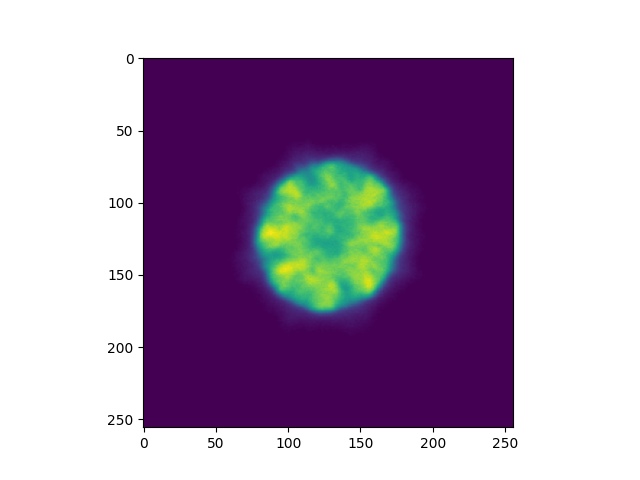

In [6]:
microscope.specimen.stage.relative_move([0,0, 0e-6])
print(microscope.specimen.stage.position*1e6)
image = microscope.acquisition.acquire_camera_image("Flucam", 1024, .02);
plt.figure()
plt.imshow(image.data[384:640, 384:640])

{'experiment': {'acceleration_voltage': 200000.0,
  'spot_size': '7',
  'detector': 'Flucam',
  'exposure_time': '0.02'}}

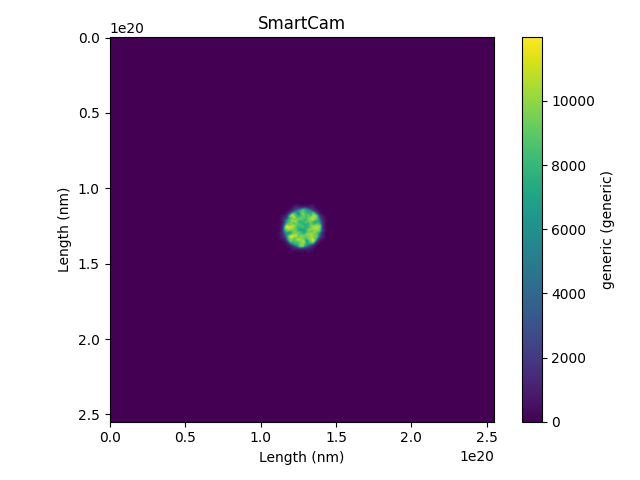

In [25]:
datasets = pyTEMlib.file_tools.adorned_to_sidpy(image)
v = datasets['Channel_000'].plot()

datasets['Channel_000'].metadata


## Focus with Sample Height

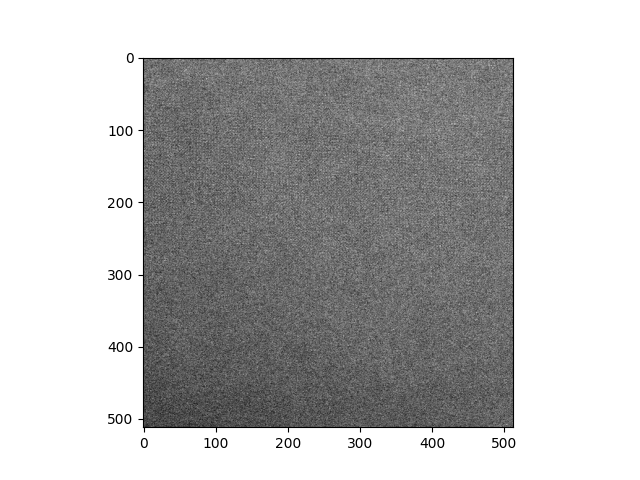

In [28]:
microscope.specimen.stage.relative_move([0, 0*1e-9, 0*1e-6])
# microscope.optics.defocus = -60e-9
image = microscope.acquisition.acquire_camera_image("Flucam", 1024, .02);
plt.figure()
plt.imshow(image.data[384:640, 384:640])


### Get Diffraction Pattern

In [10]:
ceta = microscope.acquisition.acquire_camera_image(CameraType.BM_CETA, 1024, 0.02)


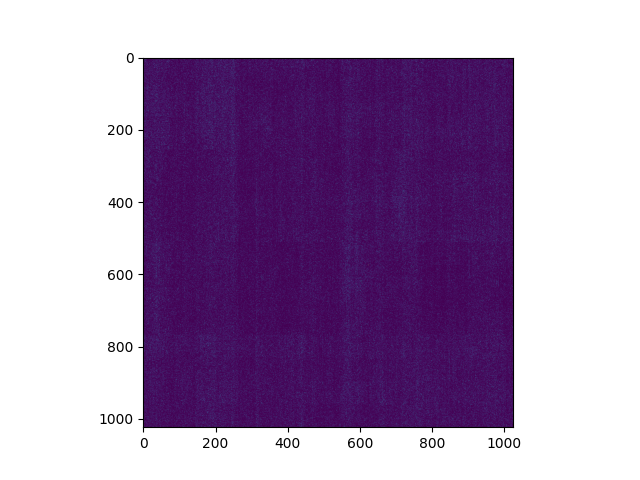

In [13]:
plt.figure()
plt.imshow(ceta.data)

{'experiment': {'acceleration_voltage': 200000.0,
  'spot_size': '7',
  'detector': 'BM-Ceta',
  'exposure_time': '0.02'}}

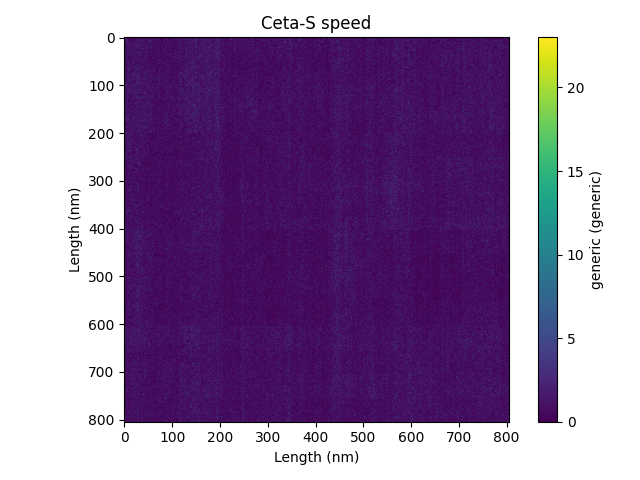

In [15]:
datasets = pyTEMlib.file_tools.adorned_to_sidpy(ceta)
v = datasets['Channel_000'].plot()

datasets['Channel_000'].metadata


In [16]:
### Adjust Convergence Angle

In [70]:
microscope.detectors.screen.insert()

microscope.detectors.screen.measure_current()
microscope.optics.unblank()

In [19]:
apertures = microscope.optics.aperture_mechanisms.C2.apertures
for aperture in apertures:
    print(aperture)
microscope.optics.aperture_mechanisms.C2.aperture = apertures[1]

aperture = microscope.optics.aperture_mechanisms.C2.aperture
print("Name: ", aperture.name)
print("Type: ", aperture.type)
print("Diameter:", aperture.diameter)

Aperture(name=100, type=Circular, diameter=100)
Aperture(name=70, type=Circular, diameter=70)
Aperture(name=50, type=Circular, diameter=50)
Aperture(name=20, type=Circular, diameter=20)
Name:  70
Type:  Circular
Diameter: 70.0


0.0040127999999999995 0.00021792


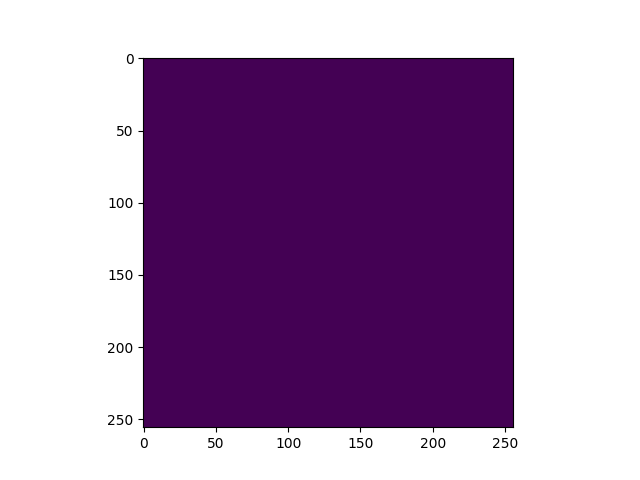

In [25]:
aperture_positions = microscope.optics.aperture_mechanisms.C2.position

print(aperture_positions.x, aperture_positions.y )

# microscope.optics.aperture_mechanisms.C2.position = aperture_positions

image = microscope.acquisition.acquire_camera_image("Flucam", 1024, .02);
plt.figure()
plt.imshow(image.data[384:640, 384:640])



In [ ]:

image = microscope.acquisition.acquire_camera_image("Flucam", 1024, .02);
plt.figure()
plt.imshow(image.data[384:640, 384:640])



## End Session

In [72]:

microscope.vacuum.column_valves.close()
print("column valve is: ", microscope.vacuum.column_valves.state)

column valve is:  Closed


## Conclusion

Acquisition of CBED Pattern is easy.

The challenge is extracting wealth of information these pattern contain